learning a [Mackey-Glass](http://www.scholarpedia.org/article/Mackey-Glass_equation) system

The original pyESN.py demo has an error of 0.139603909616, versus this error of 0.00004561433165184207

test error: 
0.19337061163271466


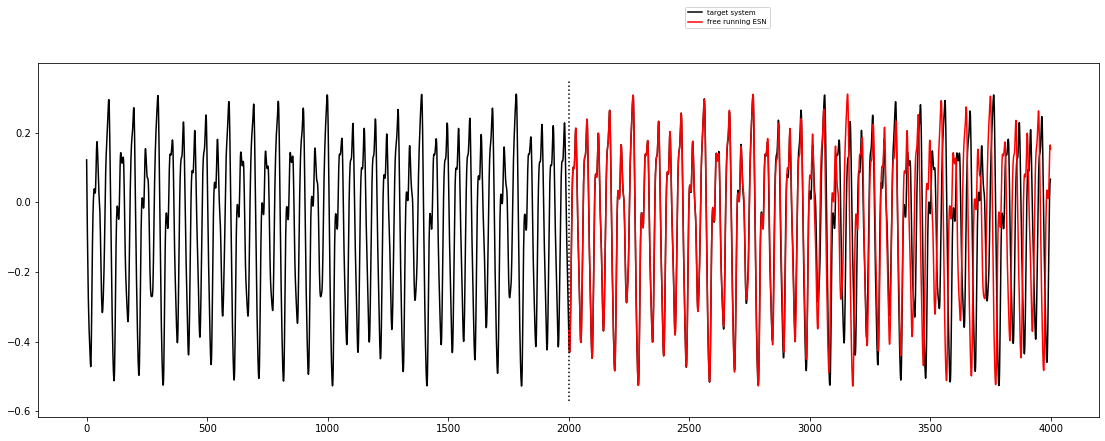

In [105]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline


size = 950

data = np.load('mackey_glass_t17.npy') #  http://minds.jacobs-university.de/mantas/code
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = size,
          spectral_radius = 0.8,
          noise = 0.0,
          sparsity = 0.5,
          projection = 1,
          steepness = 2,
          sphere_radius = 21 ,
          rectifier = 1,
          random_state=25,
        )

trainlen = 2000
future = 2000
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(19,6.5))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')

In [106]:
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

test error: 
0.19337061163271466


The original pyESN.py demo has an error of 0.139603909616, versus this error of 0.00004561433165184207

In [41]:
import datetime
print(datetime.datetime.now())

2020-05-04 23:42:29.178432
